# **Variantes du K-Means: Description et implémentation python**

Le **K-Means** est l’un des algorithmes de clustering les plus connus et les plus utilisés en apprentissage non supervisé. 

Malgré sa simplicité et son efficacité, **K-Means** présente certaines limites, comme la sensibilité aux valeurs extrêmes (outliers), la préférence pour des clusters sphériques et équilibrés, etc.

Pour pallier ces limites, plusieurs variantes ont été développées dont **K-Means++**, **Mini-Batch K-Means**, **Bisecting K-Means**, **Weighted K-Means** et les **K-Medoids (PAM, CLARA)**.

Dans ce Notebook nous explorerons et mettrons en œuvre ces différentes variantes.

## **Importation de bibliothèques et génération de données**

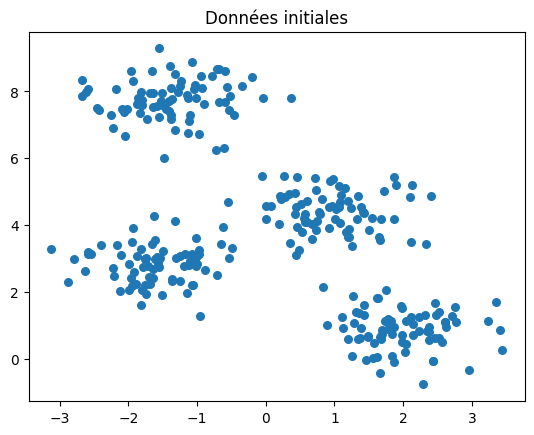

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Générer un jeu de données non supervisé avec make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualiser les données
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Données initiales")
plt.show()

### **K-Means Standard**

L'algorithme K-Means standard est une méthode de clustering itérative qui vise à partitionner $n$ observations en $k$ clusters, où chaque observation appartient au cluster avec le centroïde le plus proche. L'algorithme alterne entre deux étapes : l'étape d'affectation, où chaque point de données est attribué au cluster dont le centroïde est le plus proche, et l'étape de mise à jour, où les centroïdes des clusters sont mis à jour pour être la moyenne des points de données qui leur sont affectés.

**Cas d'utilisation:** Segmentation client, compression d'image, détection d'anomalies, analyse de documents, regroupement de résultats de recherche.

**Forces:**
* Simplicité et facilité de mise en œuvre.
* Rapidité de convergence pour de petits et moyens ensembles de données.
* Efficace sur les données numériques.

**Limites:**
* Sensibilité à l'initialisation des centroïdes (peut converger vers des minima locaux).
* Difficulté à gérer les clusters de formes non convexes ou de tailles différentes.
* Nécessite de spécifier le nombre de clusters ($k$) à l'avance.
* Sensible aux valeurs aberrantes.

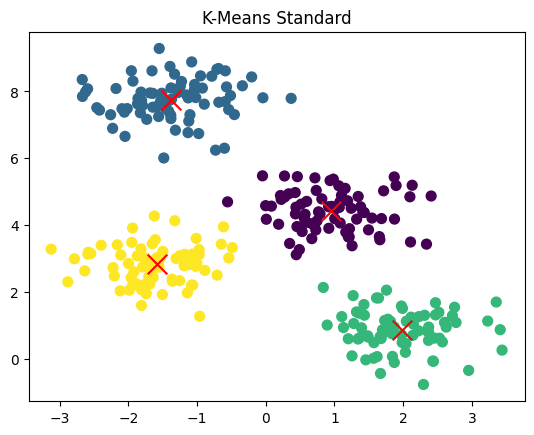

In [2]:
# K-Means Standard
kmeans_standard = KMeans(n_clusters=4, init='random', n_init=10, random_state=0)
kmeans_standard.fit(X)
y_kmeans_standard = kmeans_standard.predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_standard, s=50, cmap='viridis')
plt.scatter(kmeans_standard.cluster_centers_[:, 0], kmeans_standard.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-Means Standard')
plt.show()


### **K-Means++**

K-Means++ est une méthode d'initialisation pour l'algorithme K-Means qui sélectionne les centroïdes initiaux de manière plus intelligente afin d'éviter les mauvaises initialisations. Au lieu de choisir les centroïdes aléatoirement, K-Means++ sélectionne le premier centroïde aléatoirement, puis sélectionne les centroïdes suivants avec une probabilité proportionnelle au carré de la distance de chaque point au centroïde le plus proche déjà sélectionné.

**Cas d'utilisation:** Les mêmes que le K-Means standard, mais avec une meilleure performance et une convergence plus fiable.

**Forces:**
* Améliore la qualité du clustering en fournissant de meilleures initialisations.
* Réduit la probabilité de converger vers des minima locaux.
* Souvent conduit à une convergence plus rapide et à des résultats plus stables que le K-Means standard avec initialisation aléatoire.

**Limites:**
* Légèrement plus complexe à mettre en œuvre que l'initialisation aléatoire.
* Le processus d'initialisation est séquentiel, ce qui peut être plus lent que l'initialisation aléatoire sur de très grands ensembles de données.

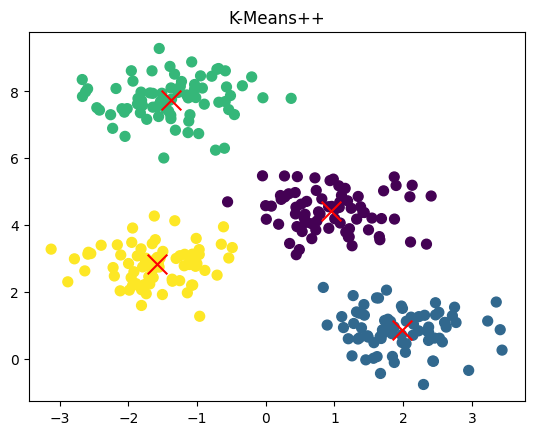

In [3]:
# K-Means++
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans_plus.fit(X)
y_kmeans_plus = kmeans_plus.predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_plus, s=50, cmap='viridis')
plt.scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-Means++')
plt.show()


### **Mini-Batch K-Means**

Mini-Batch K-Means est une variante de l'algorithme K-Means conçue pour gérer de grands ensembles de données. Au lieu d'utiliser l'ensemble complet des données à chaque itération pour mettre à jour les centroïdes, Mini-Batch K-Means utilise des mini-lots (sous-ensembles aléatoires) des données. Cela réduit considérablement le temps de calcul nécessaire pour chaque itération.

**Cas d'utilisation:** Clustering sur de très grands ensembles de données (big data), applications en temps réel où la rapidité est essentielle.

**Forces:**
* Beaucoup plus rapide que le K-Means standard sur de grands ensembles de données.
* Nécessite moins de mémoire car il ne charge pas toutes les données en mémoire à la fois.
* Peut gérer des données qui ne tiennent pas en mémoire.

**Limites:**
* Peut sacrifier légèrement la qualité du clustering par rapport au K-Means standard sur l'ensemble complet des données.
* Le résultat peut varier légèrement en fonction des mini-lots sélectionnés.

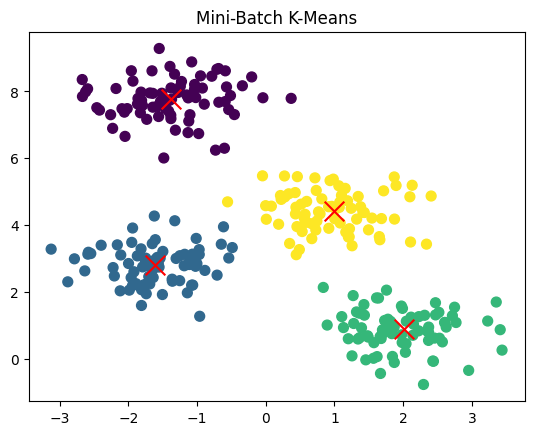

In [4]:
# Mini-Batch K-Means
from sklearn.cluster import MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=0, n_init=10)
mini_batch_kmeans.fit(X)
y_mini_batch_kmeans = mini_batch_kmeans.predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_mini_batch_kmeans, s=50, cmap='viridis')
plt.scatter(mini_batch_kmeans.cluster_centers_[:, 0], mini_batch_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Mini-Batch K-Means')
plt.show()

### **Bisecting K-Means**

Bisecting K-Means est un algorithme de clustering hiérarchique diviseur qui commence par un seul cluster contenant tous les points de données. À chaque étape, il sélectionne un cluster à diviser (généralement le plus grand ou celui avec la plus grande somme des carrés des erreurs), puis applique l'algorithme K-Means (avec $k=2$) pour diviser ce cluster en deux sous-clusters. Ce processus est répété jusqu'à ce que le nombre souhaité de clusters ($k$) soit atteint.

**Cas d'utilisation:** Clustering de données avec une structure hiérarchique implicite, analyse de documents, segmentation d'images, exploration de données.

**Forces:**
* Peut trouver des clusters de formes non convexes ou de tailles différentes mieux que le K-Means standard.
* Moins sensible aux initialisations aléatoires que le K-Means standard car il effectue des divisions successives.
* Produit une structure hiérarchique qui peut être utile pour l'analyse.

**Limites:**
* Peut être plus lent que le K-Means standard car il effectue plusieurs exécutions de K-Means.
* Le résultat final peut dépendre de l'ordre dans lequel les clusters sont divisés.
* Nécessite toujours de spécifier le nombre de clusters ($k$) à l'avance.

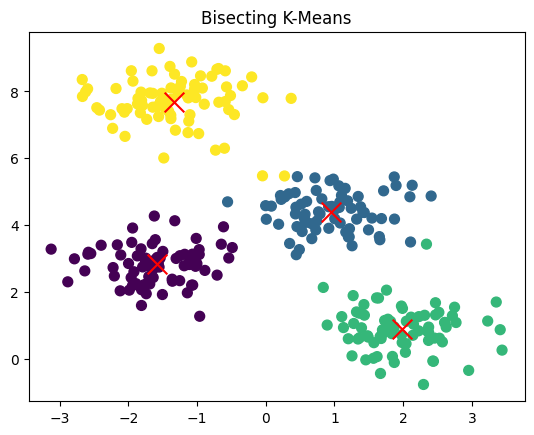

In [5]:
# BisectingKMeans
from sklearn.cluster import BisectingKMeans
bisecting_kmeans = BisectingKMeans(n_clusters=4, random_state=0)
bisecting_kmeans.fit(X)
y_bisecting_kmeans = bisecting_kmeans.predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_bisecting_kmeans, s=50, cmap='viridis')
plt.scatter(bisecting_kmeans.cluster_centers_[:, 0], bisecting_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Bisecting K-Means')
plt.show()

### **Weighted K-Means**

Weighted K-Means est une extension de l'algorithme K-Means standard où chaque point de données se voit attribuer un poids. Ces poids influencent le calcul des centroïdes, donnant plus d'importance aux points de données ayant des poids plus élevés. L'algorithme suit le même processus itératif que le K-Means standard, mais l'étape de mise à jour du centroïde calcule une moyenne pondérée des points de données dans chaque cluster.

**Cas d'utilisation:** Clustering de données où certaines observations sont considérées comme plus importantes ou fiables que d'autres, gestion des valeurs aberrantes (en leur attribuant un faible poids), analyse de données d'enquête avec des pondérations d'échantillonnage.

**Forces:**
* Permet d'incorporer des connaissances a priori ou l'importance variable des points de données dans le processus de clustering.
* Peut être utilisé pour atténuer l'influence des valeurs aberrantes.

**Limites:**
* Nécessite de définir les poids pour chaque point de données, ce qui peut être subjectif ou difficile.
* Sensible à l'initialisation des centroïdes, comme le K-Means standard.
* Toujours confronté aux limitations du K-Means standard concernant les formes de clusters non convexes.

In [6]:
from sklearn.metrics import pairwise_distances_argmin_min
# Classe Weighted K-means
class WeightedKMeans:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None

    def fit(self, X, sample_weight=None):
        n_samples, n_features = X.shape
        rng = np.random.default_rng(self.random_state)

        # Initialiser les centres aléatoirement
        centers = X[rng.choice(n_samples, self.n_clusters, replace=False)]

        # Si pas de poids, on met poids = 1 pour chaque point
        if sample_weight is None:
            sample_weight = np.ones(n_samples)

        for _ in range(self.max_iter):
            # Étape d'affectation
            labels, _ = pairwise_distances_argmin_min(X, centers)

            # Étape de mise à jour des centres pondérés
            new_centers = np.zeros((self.n_clusters, n_features))
            for k in range(self.n_clusters):
                mask = labels == k
                if np.any(mask):
                    weights_k = sample_weight[mask]
                    X_k = X[mask]
                    new_centers[k] = np.average(X_k, axis=0, weights=weights_k)
                else:
                    # Réinitialisation aléatoire si cluster vide
                    new_centers[k] = X[rng.integers(0, n_samples)]

            # Vérifier la convergence
            if np.linalg.norm(new_centers - centers) < self.tol:
                break
            centers = new_centers

        self.cluster_centers_ = centers
        self.labels_ = labels
        return self

    def fit_predict(self, X, sample_weight=None):
        self.fit(X, sample_weight=sample_weight)
        return self.labels_


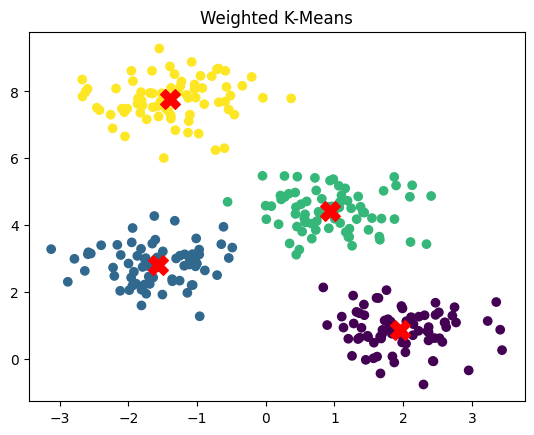

In [7]:
# Exemple de Poids basés sur densité locale
from sklearn.neighbors import NearestNeighbors

def compute_density_weights(X, k=10):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    avg_dist = distances.mean(axis=1)
    return np.exp(-avg_dist)

weights = compute_density_weights(X)

# Appliquer Weighted KMeans
wkmeans = WeightedKMeans(n_clusters=4, random_state=0)
y_wkmeans = wkmeans.fit_predict(X, sample_weight=weights)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_wkmeans, cmap='viridis')
plt.scatter(wkmeans.cluster_centers_[:, 0], wkmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("Weighted K-Means")
plt.show()


### **K-Medoids (PAM - Partitioning Around Medoids)**

K-Medoids est une approche de clustering similaire au K-Means, mais elle utilise des *medoids* au lieu de centroïdes. Un medoid est un point de données réel au sein d'un cluster qui minimise la somme des dissimilarités (distances) entre lui-même et tous les autres points du cluster. L'algorithme PAM commence par sélectionner un ensemble initial de medoids. Ensuite, il itère entre deux étapes : l'étape d'affectation, où chaque point de données est affecté au medoid le plus proche, et l'étape d'échange, où il essaie de remplacer un medoid par un non-medoid pour améliorer la qualité du clustering (mesurée par la somme des dissimilarités).

**Cas d'utilisation:** Clustering de données avec des valeurs aberrantes (les medoids sont moins sensibles aux valeurs extrêmes que les moyennes), clustering de données non numériques pour lesquelles une distance peut être définie, analyse de données catégorielles ou binaires (avec une mesure de dissimilarité appropriée).

**Forces:**
* Moins sensible aux valeurs aberrantes que K-Means car il utilise des points de données réels (medoids) comme centres.
* Peut fonctionner avec n'importe quelle mesure de dissimilarité ou de distance, ce qui le rend adapté aux données non numériques.
* Les medoids sont plus interprétables que les centroïdes virtuels.

**Limites:**
* Beaucoup plus lent que K-Means, surtout sur les grands ensembles de données, en raison de l'étape d'échange qui nécessite de calculer les dissimilarités entre toutes les paires potentielles de medoids et de non-medoids.
* Également sensible à l'initialisation initiale des medoids.
* Nécessite de spécifier le nombre de clusters ($k$).

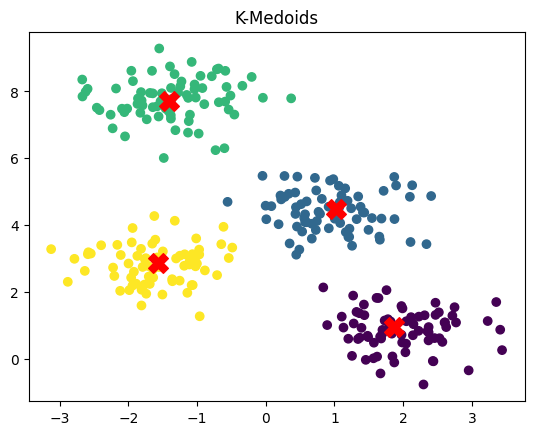

In [8]:
# K-Medoids (PAM)
# ! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=4, random_state=0, method='pam', init='k-medoids++')
kmedoids.fit(X)
y_pred_medoids = kmedoids.fit_predict(X)
# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_pred_medoids, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Medoids")
plt.show()

### **K-Medoids (CLARA - Clustering Large Applications)**

CLARA est une extension de l'algorithme PAM conçue pour gérer de grands ensembles de données. Au lieu d'appliquer PAM à l'ensemble complet des données (ce qui serait trop lent), CLARA tire plusieurs échantillons aléatoires du jeu de données. Pour chaque échantillon, il applique l'algorithme PAM pour trouver les medoids optimaux. Finalement, il sélectionne l'ensemble de medoids qui minimise la somme des dissimilarités pour l'ensemble *complet* des données (pas seulement l'échantillon).

**Cas d'utilisation:** Clustering de très grands ensembles de données où PAM est trop lent, situations nécessitant l'utilisation de medoids et de mesures de dissimilarité arbitraires sur de grandes quantités de données.

**Forces:**
* Peut gérer des ensembles de données beaucoup plus grands que PAM.
* Hérite des avantages de PAM, comme la robustesse aux valeurs aberrantes et la capacité à utiliser des mesures de dissimilarité arbitraires.
* Les medoids sont des points de données réels et sont donc interprétables.

**Limites:**
* La qualité du clustering dépend des échantillons aléatoires sélectionnés ; il n'y a aucune garantie que l'ensemble optimal de medoids soit trouvé.
* Moins précis que PAM si PAM pouvait être appliqué à l'ensemble complet des données.
* Nécessite de spécifier le nombre de clusters ($k$).
* Nécessite de choisir le nombre et la taille des échantillons.

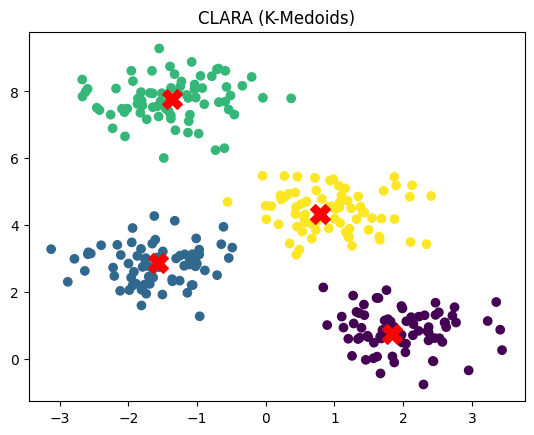

In [9]:
from sklearn.metrics import pairwise_distances

# Classe CLARA 
class CLARA:
    def __init__(self, n_clusters=4, sample_size=100, n_trials=5, random_state=42):
        self.n_clusters = n_clusters
        self.sample_size = sample_size
        self.n_trials = n_trials
        self.random_state = random_state
        self.cluster_centers_ = None
        self.labels_ = None

    def fit(self, X):
        best_labels = None
        best_medoids = None
        best_cost = np.inf
        rng = np.random.default_rng(self.random_state)

        for _ in range(self.n_trials):
            sample_idx = rng.choice(len(X), size=self.sample_size, replace=False)
            X_sample = X[sample_idx]

            pam = KMedoids(n_clusters=self.n_clusters, method='pam',
                           init='k-medoids++', random_state=self.random_state)
            pam.fit(X_sample)

            medoids = pam.cluster_centers_
            distances = pairwise_distances(X, medoids)
            labels = np.argmin(distances, axis=1)
            cost = np.sum(np.min(distances, axis=1))

            if cost < best_cost:
                best_cost = cost
                best_labels = labels
                best_medoids = medoids

        self.cluster_centers_ = best_medoids
        self.labels_ = best_labels
        return self

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

# Utilisation comme KMedoids
clara = CLARA(n_clusters=4, sample_size=100, n_trials=5, random_state=0)
y_pred_clara = clara.fit_predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=y_pred_clara, cmap='viridis')
plt.scatter(clara.cluster_centers_[:, 0], clara.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("CLARA (K-Medoids)")
plt.show()


## **Remarque:**

Les classes **WeightedKMeans** et **CLARA** implémentées dans ce Notebook sont conçues à des fins pédagogiques.
Elles ne sont pas destinées à une utilisation en production, et leur performance peut être améliorée par des optimisations spécifiques.
L'objectif est de faciliter la compréhension des concepts fondamentaux de clustering, et d'explorer des variantes moins accessibles via les bibliothèques standards. 
Ces implémentations sont volontairement simples, afin d’en faciliter la lecture et la modification. Elles ne sont pas optimisées pour une utilisation à grande échelle ou en production.

## **Tableau Comparatif des Variantes de K-Means et K-Medoids**

| Variante             | Description/Caractéristiques                                                                                                                               | Forces                                                                                                                                                              | Faiblesses/Limites                                                                                                                                                              |
| :------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **K-Means Standard** | Algorithme itératif qui partitionne les données en *k* clusters, minimisant la somme des carrés des distances par rapport aux centroïdes (moyennes). | Simplicité, rapidité pour les données de taille moyenne, efficace sur les données numériques.                                                                       | Sensible à l'initialisation, difficulté avec les clusters de formes non convexes ou de tailles différentes, nécessite de spécifier *k*, sensible aux valeurs aberrantes. |
| **K-Means++**        | Méthode d'initialisation pour K-Means qui sélectionne les centroïdes initiaux de manière plus intelligente pour améliorer la convergence.                 | Améliore la qualité du clustering, réduit la probabilité de minima locaux, convergence souvent plus rapide et stable que l'initialisation aléatoire.                   | Légèrement plus complexe à mettre en œuvre que l'initialisation aléatoire, l'initialisation séquentielle peut être plus lente sur de très grands ensembles.                   |
| **Mini-Batch K-Means** | Variante de K-Means qui utilise des mini-lots aléatoires des données à chaque itération pour mettre à jour les centroïdes. Conçu pour les grands ensembles. | Beaucoup plus rapide que K-Means standard sur les grands ensembles de données, nécessite moins de mémoire, peut gérer des données hors mémoire.                     | Peut légèrement sacrifier la qualité du clustering, le résultat peut varier selon les mini-lots.                                                                            |
| **Bisecting K-Means** | Algorithme hiérarchique diviseur qui divise récursivement des clusters en deux sous-clusters jusqu'à obtenir *k* clusters. Utilise K-Means (k=2) à chaque étape. | Peut mieux gérer les clusters de formes non convexes, moins sensible à l'initialisation que K-Means standard, produit une structure hiérarchique.                      | Peut être plus lent que K-Means standard, le résultat peut dépendre de l'ordre des divisions, nécessite de spécifier *k*.                                                     |
| **Weighted K-Means** | Extension de K-Means où chaque point de données a un poids qui influence le calcul des centroïdes (moyenne pondérée).                                   | Permet d'incorporer l'importance variable des points de données, peut atténuer l'influence des valeurs aberrantes.                                                     | Nécessite de définir les poids (peut être subjectif), sensible à l'initialisation des centroïdes, hérite des limitations de K-Means sur les formes de clusters.                 |
| **K-Medoids (PAM)**  | Utilise des *medoids* (points de données réels) comme centres de clusters. Minimise la somme des dissimilarités. Algorithme itératif basé sur l'échange.   | Moins sensible aux valeurs aberrantes que K-Means, peut fonctionner avec n'importe quelle mesure de dissimilarité, medoids plus interprétables que les centroïdes.        | Beaucoup plus lent que K-Means, surtout sur les grands ensembles de données, sensible à l'initialisation des medoids, nécessite de spécifier *k*.                               |
| **K-Medoids (CLARA)**| Extension de PAM pour les grands ensembles de données. Applique PAM sur plusieurs échantillons aléatoires et sélectionne les meilleurs medoids trouvés.      | Peut gérer des ensembles de données beaucoup plus grands que PAM, hérite des avantages de PAM (robustesse aux aberrantes, mesures de dissimilarité arbitraires).         | La qualité du clustering dépend des échantillons (pas de garantie d'optimalité), moins précis que PAM sur l'ensemble complet (si applicable), nécessite de spécifier *k*.          |

## **Conclusion Générale**

Cette analyse a permis de mettre en évidence la flexibilité et la variété des algorithmes basés sur K-Means. Pour des données bien définies, la plupart des variantes convergent vers des solutions similaires. Cependant, les différences théoriques, résumées dans le tableau comparatif, sont cruciales. Comprendre les forces et les faiblesses de chaque algorithme est fondamental pour sélectionner la méthode la plus efficace et la plus pertinente en fonction des spécificités des données et des objectifs de l'analyse de clustering.